In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

## Formatting

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth} \\usepackage{type1cm}"

## Cleaning

In [3]:
sample_df = pd.read_csv("data/sample_auxiliary.csv", header = 0, index_col = 0)
matrix_df = pd.read_csv("data/series_matrix.csv", index_col = 0)

The merged dataframe below contains all of the roughly 22K gene expression levels,
and the age/packyear features, and the label of if they have cancer or not.

I dropped rows that do not contain age/packyears, but this can be changed if we want to. I then split the data into a 60% train set (97 samples) and a 40% test set (66 samples).

In [4]:
mdf = pd.concat((sample_df[["cancer", "age", "packyears"]], matrix_df), axis = 1)

mdf = mdf.dropna()
mdf.head()

,cancer,age,packyears,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,...,90265_at,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at
geoid,,,,,,,,,,,,,,,,,,,,,
GSM93997,0,34.0,17.0,10.696879,4.236170,5.345251,7.919187,3.478706,7.142456,4.814028,...,8.113917,7.373103,3.232875,5.466897,5.952681,5.102564,5.499590,5.209175,7.569331,6.747730
GSM94019,1,63.0,75.0,10.560653,4.173343,5.788414,8.180133,3.745022,7.667475,5.254227,...,8.353391,7.714989,3.491614,5.597842,6.394273,5.452602,5.669695,4.375323,8.200798,7.133049
GSM94021,1,69.0,70.0,10.299866,4.359738,5.583276,8.213886,3.653105,7.509800,5.103016,...,8.221291,7.253566,3.333656,5.259695,6.299795,5.622406,5.984586,4.613341,7.427216,7.121853
GSM94022,1,61.0,80.0,10.467122,4.245888,5.785865,8.184135,3.718874,7.588953,5.233377,...,8.297687,7.898104,3.511188,5.409353,6.276960,5.445675,5.611665,4.369342,8.122028,7.201006
GSM94023,1,49.0,20.0,10.234799,4.537967,5.881467,8.022470,3.578695,7.692626,4.957821,...,8.242604,8.189139,3.289676,5.617069,6.064206,5.924520,6.020903,4.530274,8.119425,7.013346


In [5]:
train_df, test_df = sklearn.model_selection.train_test_split(mdf, test_size = 0.4, random_state = 12345)

In [6]:
(train_df.shape[0], test_df.shape[0])

(97, 66)

## PCA

Running PCA and basic visualization on the training set alone. Using both the age/packyear traits, and the gene probe levels as features. Performed mean/variance standardization before feeding into the sklearn PCA algorithm.

In [9]:
x_train = train_df.iloc[:,1:].values
y_train = train_df.iloc[:,0].values

In [10]:
x_train = StandardScaler().fit_transform(x)

### 2 Component

In [12]:
k = 2

pca = PCA(n_components = k)
pca_fit = pca.fit_transform(x_train)

print("Explained variance: {}".format(pca.explained_variance_ratio_))

Explained variance: [0.27562634 0.08977701]


In [13]:
pca_df = pd.DataFrame(data = pca_fit, columns = ['pc1', 'pc2'], index = train_df.index)
pca_df = pd.concat([train_df["cancer"], pca_df], axis = 1)

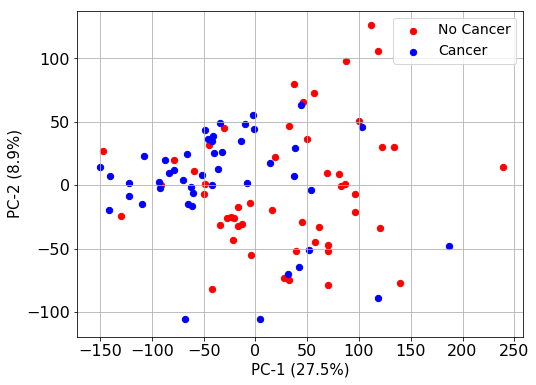

In [15]:
fig = plt.figure(figsize = (8,6))


ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("PC-1 (27.5%)", fontsize = 15)
ax.set_ylabel("PC-2 (8.9%)", fontsize = 15)

colors = ['r', 'b']
targets = [0, 1]

for target, color in zip(targets,colors):
    idx = pca_df['cancer'] == target
    ax.scatter(pca_df.loc[idx, 'pc1'], pca_df.loc[idx, 'pc2'], c = color, s = 40)
ax.legend(["No Cancer", "Cancer"])
ax.grid()

plt.savefig("images/pca_2comp.pdf")

### Variance Test

In [11]:
var = 0
k = 1

while var < 0.9:
    pca = PCA(n_components = k)
    pca_fit = pca.fit_transform(x_train)
    var = np.sum(pca.explained_variance_ratio_)
    
    print("Variance explained by k = {}: {}".format(k, var))
    
    k+=5

Variance explained by k = 1: 0.2756263368810684
Variance explained by k = 6: 0.5379915249230686
Variance explained by k = 11: 0.6324517109758956
Variance explained by k = 16: 0.6850579454706124
Variance explained by k = 21: 0.724533348588566
Variance explained by k = 26: 0.7587480149229892
Variance explained by k = 31: 0.7877387256433804
Variance explained by k = 36: 0.8125647448063767
Variance explained by k = 41: 0.8347492706323153
Variance explained by k = 46: 0.8553768932651029
Variance explained by k = 51: 0.8744711513899222
Variance explained by k = 56: 0.8923862594711565
Variance explained by k = 61: 0.9092600629103045


### Many Component

Seeing if a heatmap distinguishes between the classes when using all the features (gene probes) and running PCA to retain the majority of the samle variance.

It looks like the cancer = 1 samples are "lighter" on the PCA heatmap, but it isnt a very telling disguisher. I feel like feature selection on the initial gene probes could be very beneficial for this, so we can possibly use less PCA components to better distinguish the classes when we look at the proper genes subset from the get-go?

In [44]:
# Pull Data
x_train = train_df.iloc[:,1:].values
y_train = train_df.iloc[:,0].values
x_test = test_df.iloc[:,1:].values
y_test = test_df.iloc[:,0].values

In [82]:
k = 60

pca_train = PCA(n_components = k)
train_pca_map = pca_train.fit_transform(x_train)
test_pca_map = pca_train.transform(x_test)

print("Explained variance: {}".format(np.sum(pca_train.explained_variance_ratio_)))

Explained variance: 0.9525417855799897


In [83]:
pca_df = pd.DataFrame(data = train_pca_map, index = train_df.index)
pca_df = pd.concat([train_df["cancer"], pca_df], axis = 1)

In [84]:
pca0 = pca_df[pca_df["cancer"] == 0].values[:,1::]
pca1 = pca_df[pca_df["cancer"] == 1].values[:,1::]

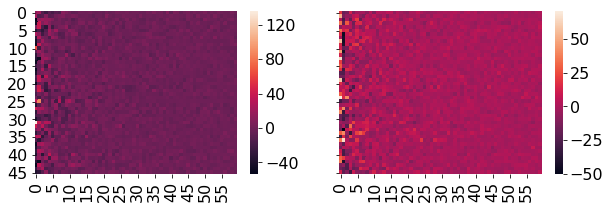

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(10,3), sharey = True) 

sns.heatmap(pca0, ax = ax[0])
sns.heatmap(pca1, ax = ax[1])

plt.show()

In [86]:
logReg = sklearn.linear_model.LogisticRegression()

logReg.fit(train_pca_map, y_train)

# Test the fitting. Diagonals are correct, off-diagonals are false pos/neg
y_train_pred = logReg.predict(train_pca_map)
sklearn.metrics.confusion_matrix(y_train, y_train_pred)

/home/sfriedowitz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[51,  0],
       [ 0, 46]])

In [87]:
# Prediction
y_pred = logReg.predict(test_pca_map)

# Diagonals are correct predictions, off-diagonals are false pos and false neg
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[26,  8],
       [ 6, 26]])

# Feature Selection

I implemented a simple forward-search feature selection based off logistic regression.

Some ideas for next steps:
Replace forward search with filter feature selection:
- Benefit: model independent, so we can independently select features and models
- Disadvantage: Gene expression data is not discrete. In order to do this the same way as the lecture notes (via mutual information, i.e. the KL divergence, we would either need to discretize the data or model the distribution of gene expression levels for each gene. Both are doable.

Refine the model type (Maybe cross-validate a few instead of guessing):
- SVM is nice and general
- Neural nets make sense since the factors are likely codependent (i.e. elevated gene B levels indicate cancer if and only if gene A is expressed).
- Random Forest could give some good results, since they are somewhat analogous to a medical diagnosis.

### Logistic Regression

In [31]:
# The training set looks like this
train_df.head()

,cancer,age,packyears,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,...,90265_at,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at
geoid,,,,,,,,,,,,,,,,,,,,,
GSM94102,0,73.0,51.0,10.409077,4.187370,5.786929,8.193616,4.017185,7.391060,5.592688,...,8.523903,7.413838,3.616377,5.122156,6.520382,5.186099,5.583749,4.463140,7.494669,7.225181
GSM94138,0,74.0,60.0,10.171600,4.450630,5.452493,7.856581,3.783571,7.020689,5.153685,...,8.461182,7.456785,3.633181,5.208761,6.281126,5.145380,5.301992,4.817690,7.355399,6.802556
GSM94078,0,27.0,0.5,10.374362,4.476058,5.481547,8.064847,3.581455,7.814767,4.934920,...,8.594075,8.052499,3.352222,5.967836,6.245699,5.619252,6.601060,4.248637,8.143510,6.927896
GSM94108,0,40.0,5.0,10.108289,4.349425,5.745103,8.114380,3.748128,8.158052,5.230585,...,8.545411,8.712353,3.451660,6.110084,6.282571,5.509835,5.912090,4.169433,8.823129,7.222318
GSM98772,1,83.0,57.0,10.391082,4.484059,5.504673,8.224718,3.684779,7.303678,5.247133,...,8.610923,7.690749,3.571178,5.575218,6.356598,5.464290,6.107196,4.820895,7.889286,6.800503


In [18]:
# Pull Data
X_train = train_df.iloc[:,1:].values
y_train = train_df.iloc[:,0].values
X_test = test_df.iloc[:,1:].values
y_test = test_df.iloc[:,0].values

In [20]:
# Let's see how logistic regression does
logReg = sklearn.linear_model.LogisticRegression()

# Train logistic regression
logReg.fit(X_train,y_train)

# Test the fitting. Diagonals are correct, off-diagonals are false pos/neg
y_train_pred = logReg.predict(X_train)
sklearn.metrics.confusion_matrix(y_train,y_train_pred)

array([[51,  0],
       [ 0, 46]])

In [21]:
# Prediction
y_pred = logReg.predict(X_test)

# Diagonals are correct predictions, off-diagonals are false pos and false neg
sklearn.metrics.confusion_matrix(y_test,y_pred)

array([[25,  9],
       [ 6, 26]])

Test set accuracy is 51/66 = 77%, whereas training set accuracy is 100%. The model is overfitting, likely because there's so many features.

### Feature Selection

In [24]:
# Wrapper function for feature selection.
# Uses k-fold cross validation
#
# Input: 
#    fList - a list of indices of the features to test (starting with 1)
#       ex: [1, 672, 16829]
#
# Output:
#    Least squares error of prediction
#
def testFeatures(X_train, y_train, fList, nsplits=5):
    # Intialize a logistic regression
    LR = sklearn.linear_model.LogisticRegression()
    
    # Split the training set into nsplits lists
    splitSize = int(np.ceil(X_train.shape[0]/nsplits))
    splitIndices = np.arange(splitSize, nsplits*splitSize, splitSize)
    X_split = np.split(X_train[:,fList],splitIndices)
    y_split = np.split(y_train,splitIndices)
    
    # nsplits-fold cross-validation
    errors = np.zeros(nsplits)
    for j in range(nsplits):
        X_tr = np.concatenate([X_split[i] for i in range(nsplits) if i!=j])
        y_tr = np.concatenate([y_split[i] for i in range(nsplits) if i!=j])
        X_val = X_split[j]
        y_val = y_split[j]
        
        LR.fit(X_tr, y_tr)
        errors[j] = np.linalg.norm(y_val - LR.predict(X_val))

    return np.mean(errors)

In [25]:
# Get Data
X_train = train_df.iloc[:,1:].values
y_train = train_df.iloc[:,0].values
X_test = test_df.iloc[:,1:].values
y_test = test_df.iloc[:,0].values

In [56]:
# Initialization
maxFeatures = 100;
n = X_train.shape[1] # number of features in original data
features = [x for x in range(n)] 

# Forward Search for best feature set
bestLoss = float('inf')
bestSet = None # empty set
searchOrder = []
currSet = set([])
lossVec = np.zeros(maxFeatures)
bestLossVec = np.zeros(maxFeatures)

# Iterate
start = time.time()
for j in range(maxFeatures):
    currBestLoss = float('inf')
    bestFeature = 0
    iterStart = time.time()
    for f in features:
        if (f not in currSet):
            currLoss = testFeatures(X_train,y_train,list(currSet) + [f]) 
            if (currLoss < currBestLoss): # Find the best feature to add
                currBestLoss = currLoss
                bestFeature = f
    currSet.add(bestFeature)
    searchOrder.append(bestFeature)
    lossVec[j] = currBestLoss
    if (currBestLoss < bestLoss): # Update best set
        bestLoss = currBestLoss
        bestSet = currSet.copy()
    bestLossVec[j] = bestLoss
    iterFinish = time.time()
    print('Iteration ' + str(j) +': ' + str(iterFinish-iterStart)[:5] + ' s')
finish = time.time()
print('Time Elapsed: ' + str(finish-start)[:5] + ' s')

Iteration 0: 36.97 s
Iteration 1: 38.14 s
Iteration 2: 38.55 s
Iteration 3: 39.03 s
Iteration 4: 39.66 s
Iteration 5: 40.05 s
Iteration 6: 40.97 s
Iteration 7: 42.07 s
Iteration 8: 42.37 s
Iteration 9: 42.87 s
Iteration 10: 44.05 s
Iteration 11: 45.64 s
Iteration 12: 45.44 s
Iteration 13: 46.03 s
Iteration 14: 46.51 s
Iteration 15: 47.12 s
Iteration 16: 48.30 s
Iteration 17: 49.00 s
Iteration 18: 50.30 s
Iteration 19: 50.77 s
Iteration 20: 50.73 s
Iteration 21: 50.92 s
Iteration 22: 51.93 s
Iteration 23: 51.71 s
Iteration 24: 52.45 s
Iteration 25: 54.03 s
Iteration 26: 54.06 s
Iteration 27: 55.27 s
Iteration 28: 56.75 s
Iteration 29: 57.18 s
Iteration 30: 58.08 s
Iteration 31: 59.33 s
Iteration 32: 61.01 s
Iteration 33: 62.92 s
Iteration 34: 62.77 s
Iteration 35: 64.23 s
Iteration 36: 65.22 s
Iteration 37: 66.00 s
Iteration 38: 66.67 s
Iteration 39: 67.49 s
Iteration 40: 69.68 s
Iteration 41: 70.97 s
Iteration 42: 72.41 s
Iteration 43: 71.84 s
Iteration 44: 71.45 s
Iteration 45: 72.49 

In [62]:
# Column numbers for best set of features
np.array(list(bestSet))

array([ 5696,    64,  8388,   133,     6,     5,    13,    17,    19,
          27,    91,   219,    30,   159, 18735,  1011,    54,    55,
          57,   250,    59,  9597])

In [108]:
# Order that best-features were selected
np.array(searchOrder)

array([ 8388,  5696, 18735,  9597,   133,     6,    17,    30,    13,
          27,    55,    57,    59,    64,    91,   250,   219,    54,
         159,    19,     5,  1011,    94,    67,    37,    98,    75,
          15,    46,     3,    52,     8,     9,    56,   104,   141,
          71,   254,    20,   105,   138,    18,   188,   212,    40,
          82,   160,   223,    39,   243,    32,    77,   214,   246,
          84,    35,    48,   256,   311,   281,     4,   304,   151,
          83,    26,   344,   385,  1416,  2037,  1017,  1220,   259,
         781,  1033,   249,    87,   334,    34,    51,   482,   364,
         509,   655,    74,   135,   330,   394,   450,   520,   211,
         261,   380,   418,   468,   668,   488,   237,  1237,   865,  1623])

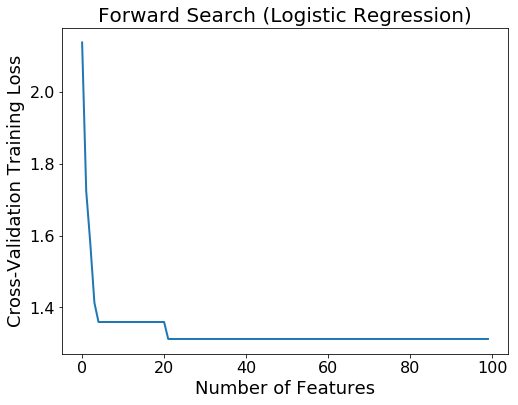

In [121]:
plt.plot(bestLossVec)
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Training Loss')
plt.title('Forward Search (Logistic Regression)')
plt.savefig('forward_search.png')
plt.show()

In [ ]:
logReg = sklearn.linear_model.LogisticRegression()
logReg.fit(X_train[:,])

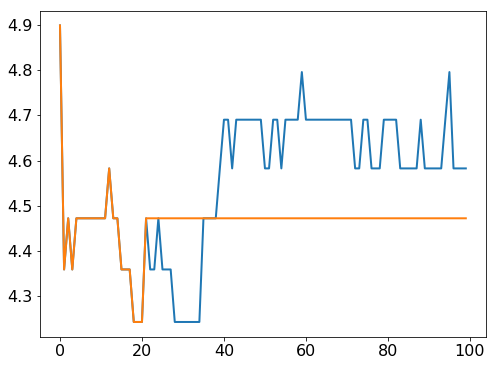

In [113]:
# Feature selection - test error analysis
logReg = sklearn.linear_model.LogisticRegression()
logReg2 = sklearn.linear_model.LogisticRegression()
test_errors = np.zeros(len(searchOrder))
best_errors = np.zeros(len(searchOrder))
setHelper = set([])
for j in range(len(searchOrder)):
    # Current best
    currIndices = searchOrder[:j+1] #first j elements searched
    logReg.fit(X_train[:,currIndices],y_train) # First j elements searched
    y_pred = logReg.predict(X_test[:,currIndices])
    test_errors[j] = np.linalg.norm(y_test - y_pred)
    
    # Only the best
    if (searchOrder[j] in bestSet):
        setHelper.add(searchOrder[j])
    logReg2.fit(X_train[:,list(setHelper)],y_train)
    y_pred2 = logReg2.predict(X_test[:,list(setHelper)])
    best_errors[j] = np.linalg.norm(y_test - y_pred2)
    
plt.plot(test_errors)
plt.plot(best_errors)
plt.show()

In [117]:
# Final Feature Set - training error
logReg.fit(X_train[:,list(bestSet)],y_train)
y_train_pred = logReg.predict(X_train[:,list(bestSet)])
sklearn.metrics.confusion_matrix(y_train,y_train_pred)

array([[43,  8],
       [ 5, 41]])

In [116]:
# Final Feature Set - prediction
y_pred = logReg.predict(X_test[:,list(bestSet)])
sklearn.metrics.confusion_matrix(y_test,y_pred)

array([[24, 10],
       [10, 22]])